# Linear Regression Example

A linear regression learning algorithm example using TensorFlow library.

In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [2]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [3]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [4]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [5]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [6]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

W0710 09:52:29.320082 17344 deprecation.py:323] From c:\users\widiy\documents\pyenvironment\testing\lib\site-packages\tensorflow\python\ops\math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.240815327 W= 0.47586343 b= -0.8263023
Epoch: 0100 cost= 0.221889123 W= 0.4624061 b= -0.72949135
Epoch: 0150 cost= 0.205148324 W= 0.4497491 b= -0.63843805
Epoch: 0200 cost= 0.190340653 W= 0.43784487 b= -0.5528
Epoch: 0250 cost= 0.177242965 W= 0.42664874 b= -0.47225523
Epoch: 0300 cost= 0.165657803 W= 0.41611835 b= -0.39650074
Epoch: 0350 cost= 0.155410737 W= 0.4062144 b= -0.3252525
Epoch: 0400 cost= 0.146347046 W= 0.39689946 b= -0.25824144
Epoch: 0450 cost= 0.138330176 W= 0.38813844 b= -0.19521548
Epoch: 0500 cost= 0.131239310 W= 0.37989855 b= -0.13593818
Epoch: 0550 cost= 0.124967523 W= 0.37214866 b= -0.08018637
Epoch: 0600 cost= 0.119420163 W= 0.3648598 b= -0.02775032
Epoch: 0650 cost= 0.114513680 W= 0.3580044 b= 0.02156708
Epoch: 0700 cost= 0.110174008 W= 0.35155675 b= 0.067951426
Epoch: 0750 cost= 0.106335774 W= 0.34549242 b= 0.11157696
Epoch: 0800 cost= 0.102940984 W= 0.33978888 b= 0.15260792
Epoch: 0850 cost= 0.099938497 W= 0.3344246 b= 0.19119859
Epoch: 0900 c

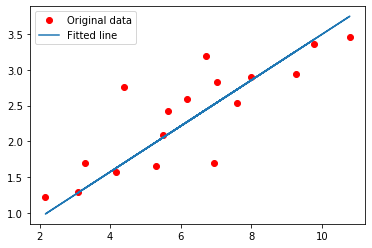

In [24]:
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

Testing... (Mean square loss Comparison)
Testing cost= 46.756947
Absolute mean square loss difference: 46.66409


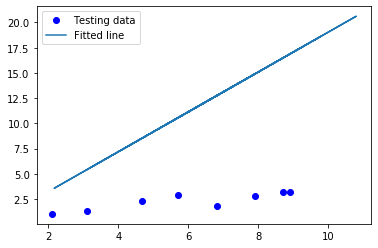

In [25]:
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Testing example, as requested (Issue #2)
    test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]), feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()